<Axes: xlabel='var_1', ylabel='var_2'>

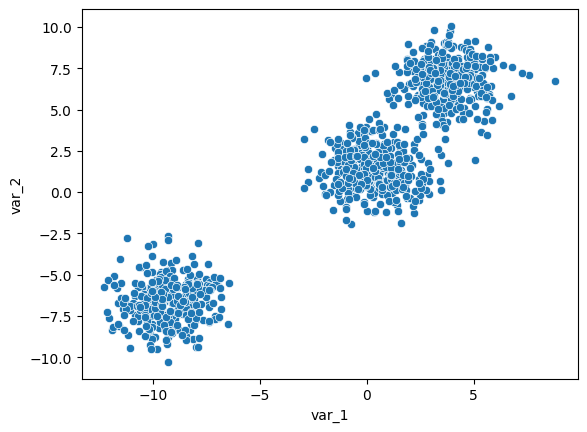

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('../data/example_cluster.csv')

sns.scatterplot(x = 'var_1', y = 'var_2', data = data)

<Axes: xlabel='var_1', ylabel='var_2'>

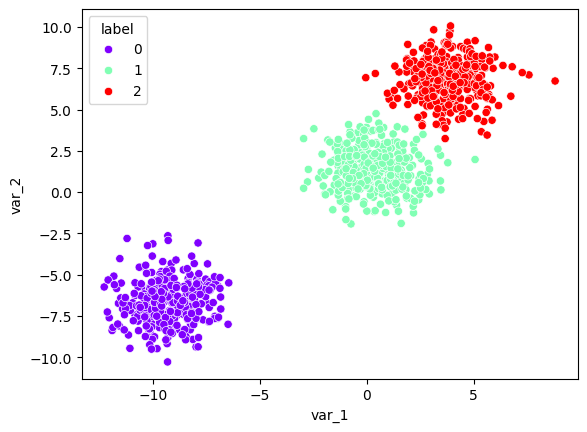

In [3]:
from sklearn.cluster import KMeans

kmeans_model = KMeans(n_clusters = 3, random_state = 100)
kmeans_model.fit(data)
kmeans_model.predict(data)

data['label'] = kmeans_model.predict(data)
sns.scatterplot(x = 'var_1', y = 'var_2', data = data, hue = 'label',
               palette = 'rainbow')

In [4]:
temp_model = KMeans(n_clusters = 500, random_state = 100)
temp_model.fit(data)

distance = []
for k in range(2,10):
    k_model = KMeans(n_clusters = k)
    k_model.fit(data)
    distance.append(k_model.inertia_)

distance

[9908.551424778394,
 3090.0332370766614,
 2717.6848537858486,
 2406.3694487955613,
 2169.7129999664603,
 1823.1089762939494,
 1722.033470365179,
 1506.7824798801812]

<Axes: >

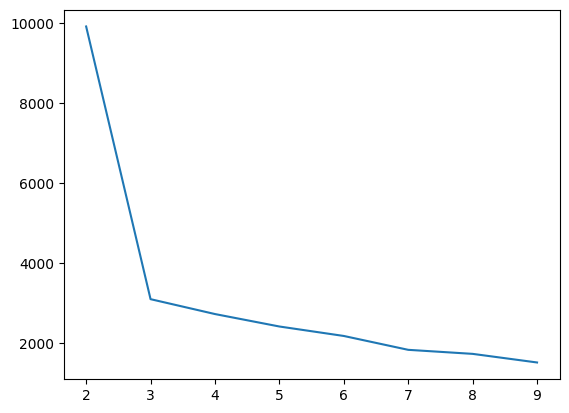

In [5]:
sns.lineplot(x = range(2,10), y = distance)

In [6]:
customer = pd.read_csv('../data/customer.csv')
customer.head()

,cc_num,category,amt
0,2703186189652095,misc,4.97
1,630423337322,grocery,107.23
2,38859492057661,entertainment,220.11
3,3534093764340240,gas_transport,45.00
4,375534208663984,misc,41.96


In [8]:
customer_dummy = pd.get_dummies(customer, columns = ['category'])

cat_list = customer_dummy.columns[2:]

for i in cat_list:
    customer_dummy[i] = customer_dummy[i] * customer['amt']

customer_agg = customer_dummy.groupby('cc_num').sum()
customer_agg.head()

,amt,category_entertainment,category_food_dining,category_gas_transport,category_grocery,category_health_fitness,category_home,category_kids_pets,category_misc,category_personal_care,category_shopping,category_travel
cc_num,,,,,,,,,,,,
60495593109,48149.62,3169.74,4043.46,5076.36,7576.58,1631.22,5458.58,4924.97,4889.57,3135.25,8106.36,137.53
571365235126,259784.87,13864.51,9055.51,36525.79,48812.73,13685.60,19342.79,17726.82,32542.61,16672.08,45994.60,5561.83
571465035400,270081.63,16162.98,15448.75,9081.62,41643.82,15244.03,28282.98,13737.95,15880.82,8771.27,59454.96,46372.45
630412733309,41959.52,3212.46,1543.16,5786.98,8416.70,3201.04,2474.68,3648.97,3109.83,2592.17,7586.79,386.74
630423337322,244612.73,12786.75,6905.07,36460.40,43854.26,12136.74,21106.87,16807.24,32400.76,15885.32,44287.02,1982.30


In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(customer_agg),
                        columns = customer_agg.columns,
                        index = customer_agg.index)

scaled_df.head()

,amt,category_entertainment,category_food_dining,category_gas_transport,category_grocery,category_health_fitness,category_home,category_kids_pets,category_misc,category_personal_care,category_shopping,category_travel
cc_num,,,,,,,,,,,,
60495593109,-1.402327,-1.135617,-0.971069,-1.000180,-1.118217,-1.561756,-1.145051,-1.276913,-1.124693,-1.070260,-1.141424,-0.619930
571365235126,1.079407,0.414075,0.168880,2.090013,0.767268,1.040236,0.844969,1.127922,1.210503,1.807350,0.659967,-0.222587
571465035400,1.200151,0.747127,1.622968,-0.606627,0.439476,1.376630,2.126364,0.378610,-0.196523,0.127825,1.299938,2.766891
630412733309,-1.474915,-1.129427,-1.539741,-0.930355,-1.079803,-1.222903,-1.572733,-1.516610,-1.274986,-1.185705,-1.166127,-0.601675
630423337322,0.901491,0.257905,-0.320220,2.083588,0.540547,0.705908,1.097814,0.955178,1.198524,1.640103,0.578781,-0.484796


<Axes: >

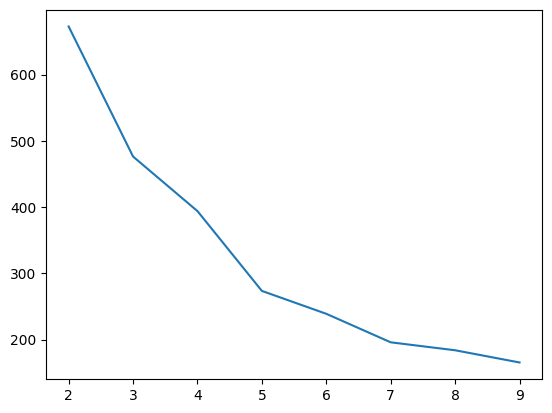

In [10]:
distance = []
for k in range(2,10):
    k_model = KMeans(n_clusters = k)
    k_model.fit(scaled_df)
    labels = k_model.predict(scaled_df)
    distance.append(k_model.inertia_)

sns.lineplot(x = range(2,10), y = distance)

<Axes: >

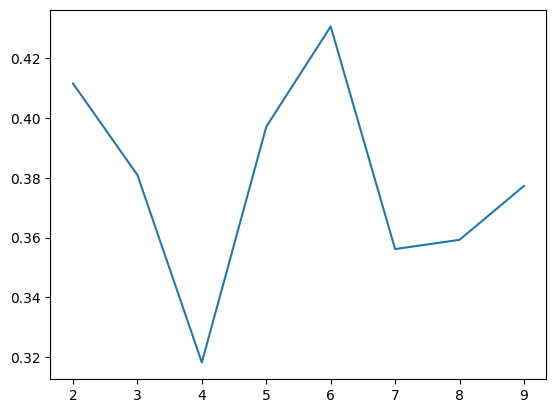

In [12]:
from sklearn.metrics import silhouette_score

silhouette = []
for k in range(2,10):
    k_model = KMeans(n_clusters = k)
    k_model.fit(scaled_df)
    labels = k_model.predict(scaled_df)
    silhouette.append(silhouette_score(scaled_df, labels))

sns.lineplot(x = range(2,10), y = silhouette)

In [13]:
k_model = KMeans(n_clusters = 6)
k_model.fit(scaled_df)
labels = k_model.predict(scaled_df)

scaled_df['label'] = labels

scaled_df_mean = scaled_df.groupby('label').mean()
scaled_df_count = scaled_df.groupby('label').count()['category_travel']

In [14]:
scaled_df_count = scaled_df_count.rename('count')
scaled_df_all = scaled_df_mean.join(scaled_df_count)
scaled_df_all

,amt,category_entertainment,category_food_dining,category_gas_transport,category_grocery,category_health_fitness,category_home,category_kids_pets,category_misc,category_personal_care,category_shopping,category_travel,count
label,,,,,,,,,,,,,
0,1.000533,0.776166,1.036432,-0.749213,0.310577,1.175961,1.794775,-0.011510,-0.311453,-0.093603,0.989477,3.050970,8
1,-0.495004,-0.423335,-0.374508,-0.229712,-0.424771,-0.428609,-0.479819,-0.394506,-0.434741,-0.450388,-0.386342,-0.233725,24
2,-1.230355,-1.041813,-1.144364,-0.938822,-0.911679,-1.250281,-1.218539,-1.335658,-0.977272,-1.080771,-0.992205,-0.313296,22
3,0.062445,-0.052893,0.189899,0.581375,0.017204,0.188483,0.197107,0.465977,0.086921,0.234713,-0.215077,-0.276640,23
4,2.246930,2.636017,2.102489,-0.339554,2.553883,1.526188,1.118452,1.527483,2.410239,2.042583,2.581577,-0.269260,7
5,0.861182,0.602189,0.424228,1.322884,0.593371,0.835418,0.725169,1.095928,0.972158,0.977414,0.628789,-0.228644,16
